In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import streamlit as st
import joblib
from twilio.rest import Client 

In [71]:
import pandas as pd
# Load your dataset
data = pd.read_csv('s_restaurant_data.csv')
data.head()

,Customer_ID,Age,Gender,Location,Occupation,Visit_Frequency,Preferred_Dining_Time,Average_Spend,Favorite_Cuisine,Total_Expenditure,Discount_Used,Payment_Method,Satisfaction_Rating,Phone
0,1,56,Male,Urban,Retired,16,Lunch,72.744732,Italian,4351.740280,1,Online,5,7358247718
1,2,69,Male,Suburban,Professional,12,Weekend,27.409181,Italian,3567.340870,1,Card,5,7200285802
2,3,46,Male,Urban,Student,12,Dinner,67.735403,Indian,620.447755,0,Card,3,7305890169
3,4,32,Female,Suburban,Student,6,Lunch,33.384532,Indian,3901.798547,0,Online,2,2549512686
4,5,60,Male,Urban,Professional,4,Dinner,89.747750,Italian,4058.990908,0,Online,4,9478835958


In [73]:
print(data.isnull().sum())

Customer_ID              0
Age                      0
Gender                   0
Location                 0
Occupation               0
Visit_Frequency          0
Preferred_Dining_Time    0
Average_Spend            0
Favorite_Cuisine         0
Total_Expenditure        0
Discount_Used            0
Payment_Method           0
Satisfaction_Rating      0
Phone                    0
dtype: int64


In [75]:
data.shape

(1000, 14)

In [77]:
print(data.describe())

       Customer_ID         Age  Visit_Frequency  Average_Spend  \
count  1000.000000  1000.00000      1000.000000    1000.000000   
mean    500.500000    43.81900        10.134000      54.603275   
std     288.819436    14.99103         5.549851      25.812197   
min       1.000000    18.00000         1.000000      10.002765   
25%     250.750000    31.00000         5.000000      32.194417   
50%     500.500000    44.00000        10.000000      54.746612   
75%     750.250000    56.00000        15.000000      76.754341   
max    1000.000000    69.00000        19.000000      99.797445   

       Total_Expenditure  Discount_Used  Satisfaction_Rating         Phone  
count        1000.000000    1000.000000          1000.000000  1.000000e+03  
mean         2544.079617       0.498000             3.045000  5.416399e+09  
std          1429.777473       0.500246             1.407464  2.618633e+09  
min           119.200037       0.000000             1.000000  1.002902e+09  
25%          1291.51

In [79]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Preferred_Dining_Time'] = label_encoder.fit_transform(data['Preferred_Dining_Time'])
data['Favorite_Cuisine'] = label_encoder.fit_transform(data['Favorite_Cuisine'])
data['Payment_Method'] = label_encoder.fit_transform(data['Payment_Method'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   int32  
 3   Location               1000 non-null   int32  
 4   Occupation             1000 non-null   int32  
 5   Visit_Frequency        1000 non-null   int64  
 6   Preferred_Dining_Time  1000 non-null   int32  
 7   Average_Spend          1000 non-null   float64
 8   Favorite_Cuisine       1000 non-null   int32  
 9   Total_Expenditure      1000 non-null   float64
 10  Discount_Used          1000 non-null   int64  
 11  Payment_Method         1000 non-null   int32  
 12  Satisfaction_Rating    1000 non-null   int64  
 13  Phone                  1000 non-null   int64  
dtypes: float64(2), int32(6), int64(6)
memory usage: 86.1 KB


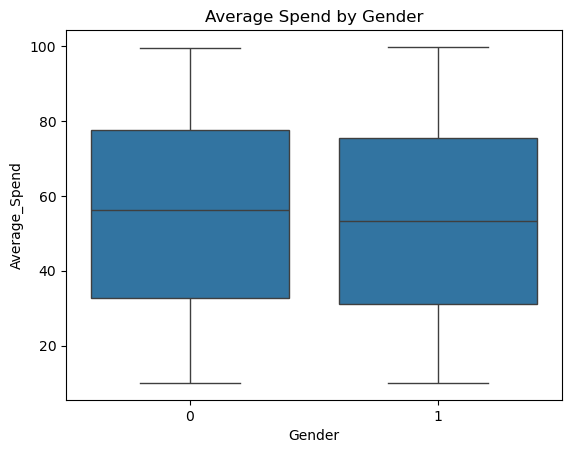

In [81]:
sns.boxplot(x='Gender', y='Average_Spend', data=data)
plt.title('Average Spend by Gender')
plt.show()

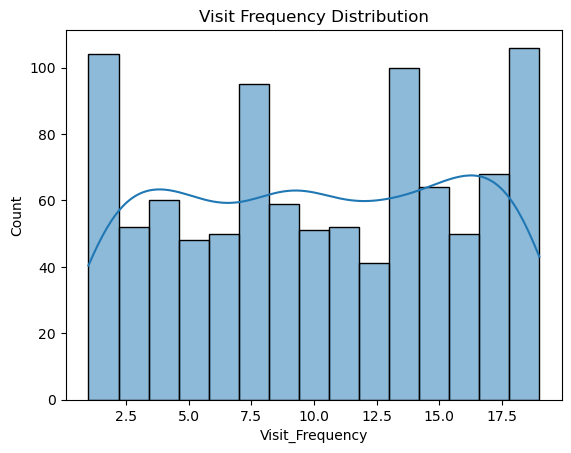

In [83]:
sns.histplot(data['Visit_Frequency'], bins=15, kde=True)
plt.title('Visit Frequency Distribution')
plt.show()

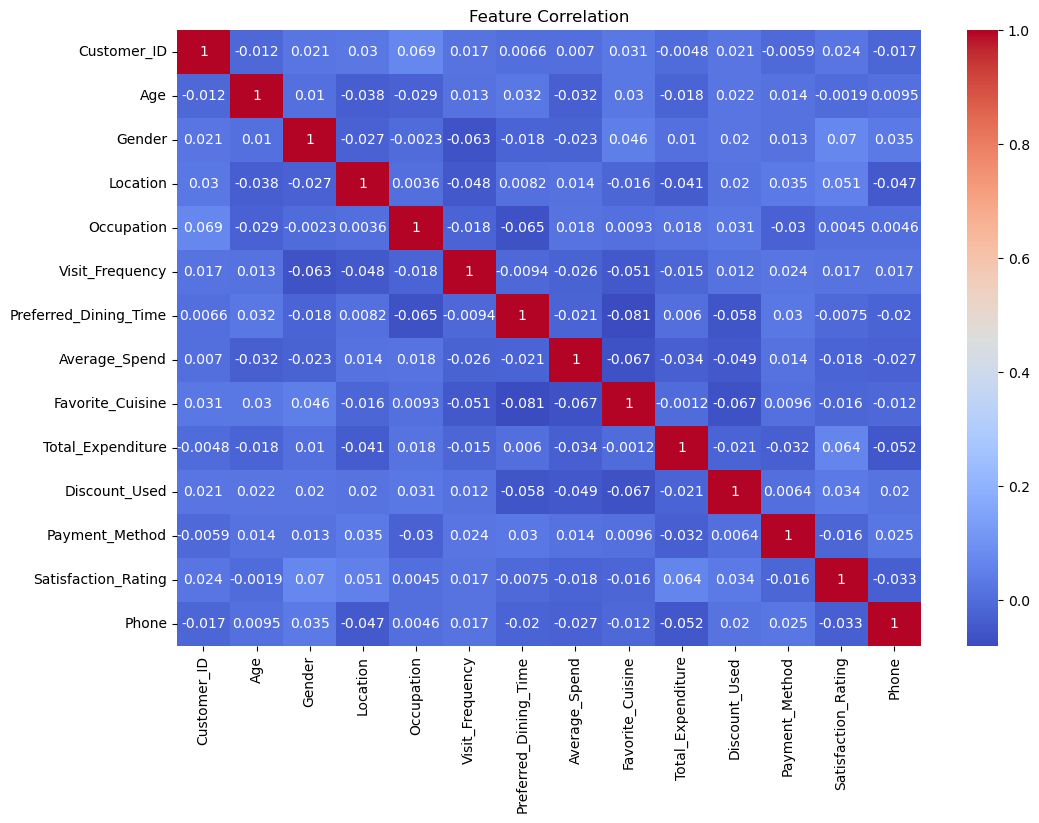

In [85]:
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

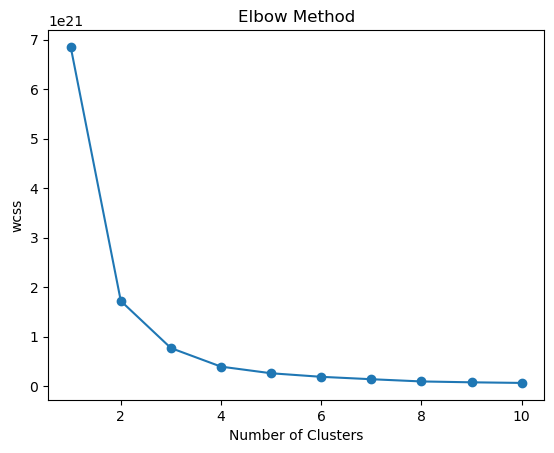

In [87]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [89]:
optimal_k = 4 # Choose based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)
print(data['Cluster'])

0      2
1      2
2      2
3      1
4      0
      ..
995    3
996    1
997    1
998    2
999    1
Name: Cluster, Length: 1000, dtype: int32


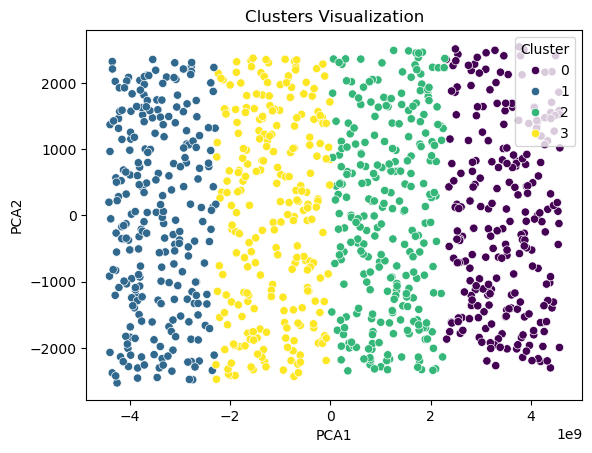

In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters Visualization')
plt.show()

In [93]:

# Drop the 'Phone' column temporarily for clustering
features_for_clustering = [
    'Age', 'Gender', 'Location', 'Occupation', 'Visit_Frequency', 
    'Preferred_Dining_Time', 'Average_Spend', 'Favorite_Cuisine', 
    'Total_Expenditure', 'Discount_Used', 'Payment_Method', 'Satisfaction_Rating'
]

# Prepare the data for clustering (excluding 'Phone')
data_for_clustering = data[features_for_clustering]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Now you can keep the 'Phone' column for later usage
# Retrieve centroids
centroids = kmeans.cluster_centers_

# Create centroids DataFrame with the correct number of columns
centroids_df = pd.DataFrame(centroids, columns=features_for_clustering)

# Display the centroids
print(centroids_df)


        Age    Gender  Location  Occupation  Visit_Frequency  \
0  0.296513  0.938536 -0.088965    0.189656        -0.618737   
1 -0.294764  0.953099  0.039225   -0.207761         0.542525   
2  0.059842 -1.049209  0.060013    0.410232        -0.152315   
3 -0.076737 -1.049209  0.007442   -0.329150         0.251397   

   Preferred_Dining_Time  Average_Spend  Favorite_Cuisine  Total_Expenditure  \
0              -0.339881      -0.052496          0.357814           0.035405   
1               0.327078       0.017096         -0.289194          -0.014756   
2               0.146650      -0.098336          0.250757           0.552023   
3              -0.074421       0.117468         -0.299319          -0.465815   

   Discount_Used  Payment_Method  Satisfaction_Rating  
0      -0.028728        0.073487            -0.290480  
1       0.063761       -0.059275             0.449466  
2       0.141442       -0.151810             0.453144  
3      -0.144290        0.101525            -0.488772 

In [95]:
data['Cluster'] = kmeans.labels_

# Group by clusters and analyze mean/median feature values
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         Customer_ID        Age    Gender  Location  Occupation  \
Cluster                                                           
0         498.192727  48.261818  0.992727  0.960000    1.174545   
1         511.553785  39.402390  1.000000  1.063745    0.848606   
2         482.473934  44.715640  0.000000  1.080569    1.355450   
3         506.825095  42.669202  0.000000  1.038023    0.749049   

         Visit_Frequency  Preferred_Dining_Time  Average_Spend  \
Cluster                                                          
0               6.701818               0.734545      53.248928   
1              13.143426               1.286853      55.044351   
2               9.289100               1.137441      52.066271   
3              11.528517               0.954373      57.633857   

         Favorite_Cuisine  Total_Expenditure  Discount_Used  Payment_Method  \
Cluster                                                                       
0                1.898182        2594.6754

In [97]:
data['Cluster'] = kmeans.labels_

# Save the updated dataset with the cluster column
data.to_csv("classified_restaurant_data.csv", index=False)
print(data.head())


   Customer_ID  Age  Gender  Location  Occupation  Visit_Frequency  \
0            1   56       1         2           1               16   
1            2   69       1         1           0               12   
2            3   46       1         2           2               12   
3            4   32       0         1           2                6   
4            5   60       1         2           0                4   

   Preferred_Dining_Time  Average_Spend  Favorite_Cuisine  Total_Expenditure  \
0                      1      72.744732                 2        4351.740280   
1                      2      27.409181                 2        3567.340870   
2                      0      67.735403                 1         620.447755   
3                      1      33.384532                 1        3901.798547   
4                      0      89.747750                 2        4058.990908   

   Discount_Used  Payment_Method  Satisfaction_Rating       Phone  Cluster  \
0              1    

In [99]:
print(pca.components_.shape)

(2, 15)


In [101]:
print(data.columns)

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Occupation',
       'Visit_Frequency', 'Preferred_Dining_Time', 'Average_Spend',
       'Favorite_Cuisine', 'Total_Expenditure', 'Discount_Used',
       'Payment_Method', 'Satisfaction_Rating', 'Phone', 'Cluster', 'PCA1',
       'PCA2'],
      dtype='object')


In [103]:
feature_columns = ['Customer_ID', 'Age', 'Gender', 'Location', 'Occupation', 'Visit_Frequency', 
                   'Preferred_Dining_Time', 'Average_Spend', 'Favorite_Cuisine', 'Total_Expenditure', 
                   'Discount_Used', 'Payment_Method', 'Satisfaction_Rating','Phone']
data_for_pca = data[feature_columns]

# If necessary, convert categorical features into numerical using encoding
data_for_pca = pd.get_dummies(data_for_pca, drop_first=True)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_for_pca)

# Retrieve PCA components
pca_components = pd.DataFrame(pca.components_, columns=feature_columns)

In [105]:
# Display the first two components
print(pca_components.iloc[:2])

    Customer_ID           Age        Gender      Location    Occupation  \
0 -1.901303e-09  5.443688e-11  6.738240e-12 -1.438604e-11  1.439525e-12   
1 -1.198326e-03 -1.848391e-04  4.160884e-06 -2.477919e-05  1.038130e-05   

   Visit_Frequency  Preferred_Dining_Time  Average_Spend  Favorite_Cuisine  \
0     3.647444e-11          -6.441819e-12  -2.614125e-10     -5.121656e-12   
1    -5.503186e-05           2.849282e-06  -6.365992e-04     -1.417897e-06   

   Total_Expenditure  Discount_Used  Payment_Method  Satisfaction_Rating  \
0      -2.839786e-08   3.736261e-12    7.554141e-12        -1.753700e-11   
1       9.999991e-01  -6.992758e-06   -1.719848e-05         6.164782e-05   

          Phone  
0  1.000000e+00  
1  2.839541e-08  


In [107]:
data['Cluster'] = kmeans.labels_
print(data.columns)

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Occupation',
       'Visit_Frequency', 'Preferred_Dining_Time', 'Average_Spend',
       'Favorite_Cuisine', 'Total_Expenditure', 'Discount_Used',
       'Payment_Method', 'Satisfaction_Rating', 'Phone', 'Cluster', 'PCA1',
       'PCA2'],
      dtype='object')


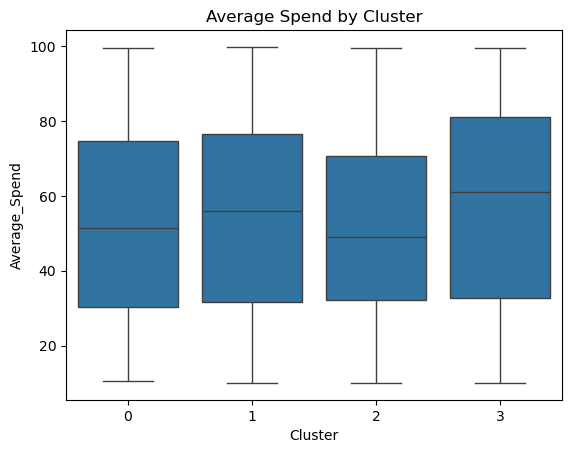

In [109]:
# Example: Boxplot of Average Spend per Cluster
sns.boxplot(x='Cluster', y='Average_Spend', data=data)
plt.title('Average Spend by Cluster')
plt.show()

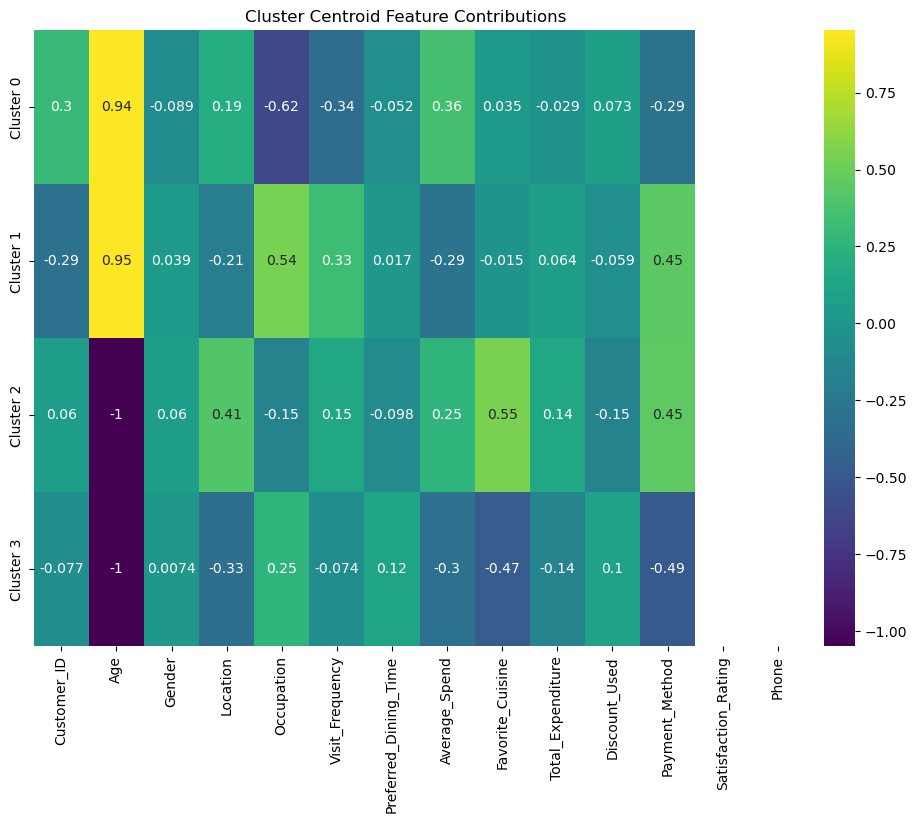

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True, cmap='viridis', xticklabels=feature_columns, yticklabels=[f'Cluster {i}' for i in range(len(centroids_df))])
plt.title('Cluster Centroid Feature Contributions')
plt.show()

In [113]:
data['Profitability'] = data['Total_Expenditure'] / data['Visit_Frequency']
cluster_profitability = data.groupby('Cluster')['Profitability'].mean()
print(cluster_profitability)

Cluster
0    749.144250
1    263.726098
2    613.480335
3    244.962247
Name: Profitability, dtype: float64


In [115]:
features = ['Age', 'Visit_Frequency', 'Average_Spend', 'Total_Expenditure']
X = data[features]
# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit KMeans to the scaled data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Step 3: Predict for a new customer
new_customer = [[35, 5, 45.0, 1000]]  # Example new customer data
scaled_customer = scaler.transform(new_customer)
prediction = kmeans.predict(scaled_customer)

print(f'This customer belongs to Cluster {prediction[0]}')


This customer belongs to Cluster 3


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [117]:
recommendations = data.groupby('Cluster')['Favorite_Cuisine'].apply(lambda x: x.mode()[0])
print(recommendations)

Cluster
0    3
1    0
2    3
3    0
Name: Favorite_Cuisine, dtype: int32


In [119]:
print(data['Phone'].head(3))

0    7358247718
1    7200285802
2    7305890169
Name: Phone, dtype: int64


In [121]:
print(data['Phone'])

0      7358247718
1      7200285802
2      7305890169
3      2549512686
4      9478835958
          ...    
995    4164672689
996    1747106825
997    1588914726
998    7168933604
999    2986780833
Name: Phone, Length: 1000, dtype: int64


In [123]:
first_two_customers = data.iloc[:10]
print("First two customers belong to these clusters:")
print(first_two_customers[['Cluster']])

First two customers belong to these clusters:
   Cluster
0        1
1        1
2        0
3        2
4        0
5        1
6        1
7        3
8        2
9        0


In [125]:
import streamlit as st
st.title("Restaurant Customer Segmentation")
st.write(data[['Cluster', 'Age', 'Visit_Frequency', 'Average_Spend']].head())

2025-01-21 18:59:11.801 
  command:

    streamlit run C:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [127]:

import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [129]:
from twilio.rest import Client
import pandas as pd

# Twilio Credentials
account_sid = "your account id"
auth_token = "your authorised token"
twilio_phone = "your twilio phone number"


In [131]:
client = Client(account_sid, auth_token)

# Load the dataset
data = pd.read_csv("classified_restaurant_data.csv")

# Define messages for each cluster
messages = {
    0:"Dear Customer,We’d love to see you more often! Let us know how we can improve your experience. Enjoy a 15% discount on your next visit and try our new Vegan Burger!",
    1: "Dear Valued Customer,Thanks for being a regular! We’ve applied a 10% discount for you on your next visit. Don’t miss our new Pasta Primavera, just for you!",
    2: "Dear Customer,We appreciate your visits! Enjoy a free appetizer on your next meal and try our exciting new Tofu Stir-Fry!",
    3: "Dear Customer,Your satisfaction matters to us. Share your feedback and enjoy a 20% off your next visit! Also, try our new Grilled Chicken Salad!",
}

# Ensure phone numbers are strings and properly formatted
data["Phone"] = data["Phone"].apply(
    lambda x: f"+91{str(int(float(x))).strip()}" if "." in str(x) else f"+91{str(x).strip()}"
)

# Ensure that the dataset contains 'Phone' and 'Cluster' columns
if "Cluster" in data.columns and "Phone" in data.columns:
    for index, row in data.head(10).iterrows():  # Process only the first 3 rows for testing
        customer_cluster = row["Cluster"]
        customer_phone = row["Phone"]  # Define customer_phone here
        
        print(f"Sending message to: {customer_phone}")  # Now, customer_phone is defined
        
        # Prepare the message
        message_body = messages.get(customer_cluster, "Thank you for being our valued customer!")

        # Send SMS
        try:
            message = client.messages.create(
                body=message_body,
                from_=twilio_phone,
                to=customer_phone
            )
            print(f"Message sent to {customer_phone}: SID {message.sid}")
        except Exception as e:
            print(f"Failed to send message to {customer_phone}: {e}")
else:
    print("Error: 'Cluster' or 'Phone' column missing in the dataset.")


Sending message to: +917358247718
Message sent to +917358247718: SID SM17d17361870bfb0174ae66a03ab916b9
Sending message to: +917200285802
Message sent to +917200285802: SID SM49659e39389d62279125f016d7928ba7
Sending message to: +917305890169
Message sent to +917305890169: SID SM9698778df0d9f5f3676656dbd78dc41b
Sending message to: +912549512686
Failed to send message to +912549512686: HTTP 400 error: Unable to create record: Invalid 'To' Phone Number: +91254951XXXX
Sending message to: +919478835958
Failed to send message to +919478835958: HTTP 400 error: Unable to create record: The number +91947883XXXX is unverified. Trial accounts cannot send messages to unverified numbers; verify +91947883XXXX at twilio.com/user/account/phone-numbers/verified, or purchase a Twilio number to send messages to unverified numbers
